In [23]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/e-commerce-shoppers-behaviour-understanding/test_data_v2.csv
/kaggle/input/e-commerce-shoppers-behaviour-understanding/train_data_v2.csv
/kaggle/input/e-commerce-shoppers-behaviour-understanding/sample.csv


In [24]:
#Load basic libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [25]:
import sklearn
import xgboost
import imblearn
import numpy as np
import pandas as pd
import scipy
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [26]:
#analyse submission sample dataset

sample=pd.read_csv('/kaggle/input/e-commerce-shoppers-behaviour-understanding/sample.csv')
sample.head()

,id,Made_Purchase
0,0,False
1,1,False
2,2,False
3,3,False
4,4,False


In [27]:
#load the training and testing datasets

train_data=pd.read_csv('/kaggle/input/e-commerce-shoppers-behaviour-understanding/train_data_v2.csv')
test_data=pd.read_csv('/kaggle/input/e-commerce-shoppers-behaviour-understanding/test_data_v2.csv')

In [28]:
test_data.shape

(6599, 21)

In [29]:
train_data.head()

,HomePage,HomePage_Duration,LandingPage,LandingPage_Duration,ProductDescriptionPage,ProductDescriptionPage_Duration,GoogleMetric:Bounce Rates,GoogleMetric:Exit Rates,GoogleMetric:Page Values,SeasonalPurchase,...,SearchEngine,Zone,Type of Traffic,CustomerType,Gender,Cookies Setting,Education,Marital Status,WeekendPurchase,Made_Purchase
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,...,1.0,9.0,3.0,Returning_Visitor,Not Specified,Deny,Not Specified,Other,0.0,False
1,0.0,0.0,0.0,0.0,2.0,2.666667,0.05,0.14,0.0,0.0,...,2.0,2.0,4.0,Returning_Visitor,Female,Deny,Others,Married,0.0,False
2,0.0,0.0,0.0,0.0,10.0,627.500000,0.02,0.05,0.0,0.0,...,3.0,1.0,4.0,Returning_Visitor,Female,ALL,Others,Married,1.0,False
3,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.4,...,4.0,3.0,3.0,Returning_Visitor,Male,ALL,Diploma,Single,0.0,False
4,1.0,0.0,0.0,0.0,0.0,0.000000,0.20,0.20,0.0,0.0,...,2.0,1.0,5.0,Returning_Visitor,Male,Deny,Diploma,Other,1.0,False


In [30]:
train_data.isna().sum()

HomePage                           153
HomePage_Duration                  150
LandingPage                        153
LandingPage_Duration               135
ProductDescriptionPage             123
ProductDescriptionPage_Duration    167
GoogleMetric:Bounce Rates          151
GoogleMetric:Exit Rates            129
GoogleMetric:Page Values           132
SeasonalPurchase                   150
Month_SeasonalPurchase             144
OS                                 134
SearchEngine                       122
Zone                               117
Type of Traffic                    143
CustomerType                       144
Gender                             145
Cookies Setting                    144
Education                          136
Marital Status                     130
WeekendPurchase                    121
Made_Purchase                        0
dtype: int64

In [31]:
#data distribution of target

train_data['Made_Purchase'].value_counts()

False    9065
True     5666
Name: Made_Purchase, dtype: int64

In [32]:
for c in train_data.columns:
  print(train_data[c].value_counts())
  print('--------------')

0.0     6977
1.0     1580
2.0     1264
3.0     1114
4.0      882
5.0      700
6.0      485
7.0      385
8.0      303
9.0      252
10.0     180
11.0     111
12.0     101
13.0      60
14.0      56
15.0      41
16.0      22
17.0      20
18.0      14
19.0       7
22.0       7
23.0       6
24.0       3
21.0       3
20.0       3
27.0       1
26.0       1
Name: HomePage, dtype: int64
--------------
0.000000      7130
4.000000        76
5.000000        62
11.000000       55
6.000000        49
              ... 
405.550000       1
101.851111       1
218.966667       1
291.235714       1
168.700000       1
Name: HomePage_Duration, Length: 2844, dtype: int64
--------------
0.0     11525
1.0      1206
2.0       859
3.0       452
4.0       239
5.0       119
6.0        89
7.0        40
8.0        13
9.0        12
10.0        9
12.0        5
13.0        4
14.0        2
16.0        2
11.0        1
24.0        1
Name: LandingPage, dtype: int64
--------------
0.000000      11804
13.000000        35
10.0

In [33]:
X_train=train_data.drop('Made_Purchase',axis=1)
y_train=train_data['Made_Purchase'].copy()

In [34]:
test_data.head()

,HomePage,HomePage_Duration,LandingPage,LandingPage_Duration,ProductDescriptionPage,ProductDescriptionPage_Duration,GoogleMetric:Bounce Rates,GoogleMetric:Exit Rates,GoogleMetric:Page Values,SeasonalPurchase,...,OS,SearchEngine,Zone,Type of Traffic,CustomerType,Gender,Cookies Setting,Education,Marital Status,WeekendPurchase
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.200000,0.200000,0.0,0.0,...,1.0,1.0,1.0,1.0,Returning_Visitor,Not Specified,Deny,Not Specified,Single,0.0
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.000000,0.100000,0.0,0.0,...,2.0,2.0,1.0,2.0,Returning_Visitor,Not Specified,ALL,Graduate,Married,0.0
2,0.0,0.0,0.0,0.0,19.0,154.216667,0.015789,0.024561,0.0,0.0,...,2.0,2.0,1.0,3.0,Returning_Visitor,Female,Required,Diploma,Other,0.0
3,0.0,0.0,0.0,0.0,2.0,37.000000,0.000000,0.100000,0.0,0.8,...,2.0,2.0,2.0,3.0,Returning_Visitor,Not Specified,Required,Graduate,Other,0.0
4,0.0,0.0,0.0,0.0,16.0,407.750000,0.018750,0.025833,0.0,0.4,...,1.0,1.0,4.0,3.0,Returning_Visitor,Female,Deny,Others,Other,0.0


In [35]:
train_data=train_data.iloc[:,[1,3,5,6,7,8,0,2,4,9,10,11,12,13,14,18,15,16,17,19,20,21]]
test_data=test_data.iloc[:,[1,3,5,6,7,8,0,2,4,9,10,11,12,13,14,18,15,16,17,19,20]]

In [36]:
train_data

,HomePage_Duration,LandingPage_Duration,ProductDescriptionPage_Duration,GoogleMetric:Bounce Rates,GoogleMetric:Exit Rates,GoogleMetric:Page Values,HomePage,LandingPage,ProductDescriptionPage,SeasonalPurchase,...,SearchEngine,Zone,Type of Traffic,Education,CustomerType,Gender,Cookies Setting,Marital Status,WeekendPurchase,Made_Purchase
0,0.000000,0.0,0.000000,0.200000,0.200000,0.0,0.0,0.0,1.0,0.0,...,1.0,9.0,3.0,Not Specified,Returning_Visitor,Not Specified,Deny,Other,0.0,False
1,0.000000,0.0,2.666667,0.050000,0.140000,0.0,0.0,0.0,2.0,0.0,...,2.0,2.0,4.0,Others,Returning_Visitor,Female,Deny,Married,0.0,False
2,0.000000,0.0,627.500000,0.020000,0.050000,0.0,0.0,0.0,10.0,0.0,...,3.0,1.0,4.0,Others,Returning_Visitor,Female,ALL,Married,1.0,False
3,0.000000,0.0,0.000000,0.200000,0.200000,0.0,0.0,0.0,1.0,0.4,...,4.0,3.0,3.0,Diploma,Returning_Visitor,Male,ALL,Single,0.0,False
4,0.000000,0.0,0.000000,0.200000,0.200000,0.0,1.0,0.0,0.0,0.0,...,2.0,1.0,5.0,Diploma,Returning_Visitor,Male,Deny,Other,1.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14726,4.000000,0.0,983.138889,0.015385,0.017599,0.0,1.0,0.0,39.0,0.0,...,2.0,6.0,3.0,NaN,Returning_Visitor,Female,Deny,Married,0.0,True
14727,117.023809,57.0,252.892857,0.000000,0.011078,0.0,8.0,2.0,11.0,0.0,...,2.0,2.0,4.0,Diploma,Returning_Visitor,Not Specified,ALL,Married,0.0,True
14728,75.600000,652.8,1143.666667,0.000000,0.023333,0.0,2.0,2.0,10.0,0.0,...,2.0,4.0,2.0,Others,Returning_Visitor,Not Specified,Required,Single,0.0,True
14729,0.000000,0.0,1057.000000,0.000000,0.033333,0.0,0.0,0.0,6.0,0.0,...,4.0,4.0,1.0,Not Specified,Returning_Visitor,Not Specified,Required,Married,0.0,True


<AxesSubplot:>

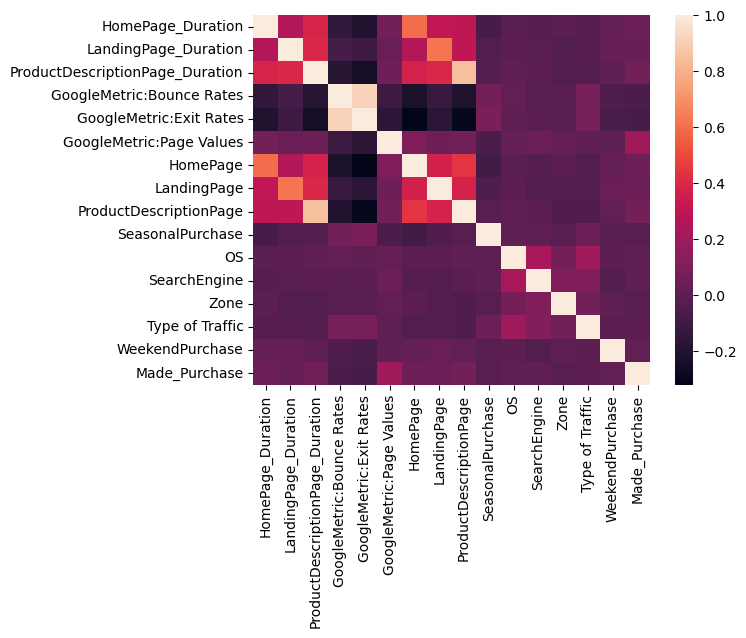

In [37]:
import seaborn as sns
sns.heatmap(train_data.corr())

In [38]:
from sklearn.model_selection import train_test_split
train_set,test_set=train_test_split(train_data,test_size=0.2,random_state=42)

In [39]:
X_train=train_set.drop('Made_Purchase',axis=1)
y_train=train_set['Made_Purchase'].copy()

X_test=test_set.drop('Made_Purchase',axis=1)
y_test=test_set['Made_Purchase'].copy()

In [40]:
X_train

,HomePage_Duration,LandingPage_Duration,ProductDescriptionPage_Duration,GoogleMetric:Bounce Rates,GoogleMetric:Exit Rates,GoogleMetric:Page Values,HomePage,LandingPage,ProductDescriptionPage,SeasonalPurchase,...,OS,SearchEngine,Zone,Type of Traffic,Education,CustomerType,Gender,Cookies Setting,Marital Status,WeekendPurchase
2435,0.000000,0.00,472.666667,0.075676,0.100511,0.000000,0.0,0.0,36.0,0.8,...,3.0,2.0,7.0,13.0,Graduate,Returning_Visitor,Male,ALL,Single,0.0
8743,0.000000,0.00,416.583333,0.000000,0.036667,0.000000,NaN,0.0,10.0,0.0,...,1.0,1.0,3.0,2.0,Graduate,Returning_Visitor,Not Specified,ALL,Other,0.0
14646,104.113636,95.00,2411.789279,0.000000,0.010683,16.784202,6.0,3.0,95.0,0.0,...,3.0,2.0,5.0,6.0,Diploma,Returning_Visitor,Not Specified,Deny,Other,0.0
13117,90.416667,0.00,100.416667,0.000000,0.020000,0.000000,6.0,0.0,5.0,0.0,...,1.0,2.0,6.0,8.0,Graduate,New_Visitor,Not Specified,Deny,Other,0.0
10489,88.375000,0.00,3230.546573,0.000000,0.017862,15.384330,11.0,1.0,NaN,0.0,...,1.0,1.0,7.0,2.0,Diploma,Returning_Visitor,Not Specified,Deny,Single,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5191,148.900000,0.00,692.220000,0.038710,0.039355,0.000000,10.0,0.0,25.0,0.0,...,1.0,1.0,7.0,1.0,Others,Returning_Visitor,Not Specified,Required,Married,1.0
13418,38.166667,0.00,77.666667,0.000000,0.012500,0.000000,3.0,0.0,5.0,NaN,...,1.0,1.0,5.0,3.0,Diploma,Returning_Visitor,Male,ALL,Married,0.0
5390,75.100000,0.00,102.700000,0.000000,0.011111,0.000000,4.0,0.0,7.0,0.0,...,2.0,4.0,6.0,2.0,Diploma,Returning_Visitor,Male,Deny,Married,0.0
860,0.000000,0.00,67.500000,0.000000,0.066667,0.000000,0.0,0.0,3.0,0.0,...,1.0,1.0,3.0,3.0,Not Specified,Returning_Visitor,Not Specified,Deny,Married,1.0


In [41]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OrdinalEncoder, OneHotEncoder
from sklearn.pipeline import FeatureUnion

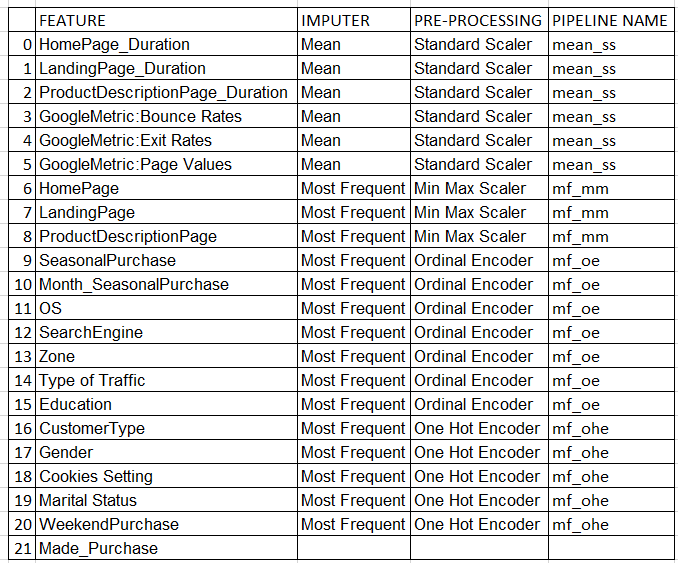

In [42]:
mean_ss_pipeline=Pipeline([('selector1',ColumnTransformer([('select_first_6','passthrough',slice(0,6))])),('imputer1',SimpleImputer(strategy="mean")),('ss',StandardScaler()),])
mf_mm_pipeline=Pipeline([('selector2',ColumnTransformer([('select_next_3','passthrough',slice(6,9))])),('imputer2',SimpleImputer(strategy="most_frequent")),('mm',MinMaxScaler()),])
mf_oe_pipeline=Pipeline([('selector3',ColumnTransformer([('select_next_7','passthrough',slice(9,16))])),('imputer3',SimpleImputer(strategy="most_frequent")),('oe',OrdinalEncoder()),])
mf_ohe_pipeline=Pipeline([('selector4',ColumnTransformer([('select_last_5','passthrough',slice(16,21))])),('imputer4',SimpleImputer(strategy="most_frequent")),('ohe',OneHotEncoder()),])

full_pipeline=FeatureUnion(transformer_list=[("mean_ss_pipeline",mean_ss_pipeline),("mf_mm_pipeline",mf_mm_pipeline),("mf_oe_pipeline",mf_oe_pipeline),("mf_ohe_pipeline",mf_ohe_pipeline),])


In [43]:
X_train=full_pipeline.fit_transform(X_train)
X_test=full_pipeline.fit_transform(X_test)
test_data=full_pipeline.fit_transform(test_data)
#fit on test data provided


In [ ]:

from sklearn.ensemble import ExtraTreesClassifier, AdaBoostClassifier, StackingClassifier
from xgboost import XGBClassifier

xgb = XGBClassifier(random_state=42)
ada = AdaBoostClassifier(random_state=0)
et = ExtraTreesClassifier(random_state=0)
estimators = [('ada', ada), ('et', et)]
classifier = StackingClassifier(estimators=estimators, final_estimator=xgb, passthrough=True)

classifier.fit(X_train, y_train)
print(classifier.predict(X_test))
print(classifier.predict_proba(X_test))
classifier.score(X_test, y_test)

[ True  True  True ...  True  True  True]


In [ ]:
# from sklearn.ensemble import AdaBoostClassifier
# ada_boost = AdaBoostClassifier(n_estimators=100, random_state=0).fit(X_train, y_train)
# print(ada_boost.predict(X_test))
# print(ada_boost.predict_proba(X_test))
# ada_boost.score(X_test, y_test)


In [ ]:
# # define the model with default hyperparameters
# ada_boost_revised = AdaBoostClassifier()

# # define the grid of values to search
# grid = dict()
# grid['n_estimators'] = [10, 50, 100, 500]
# grid['learning_rate'] = [0.0001, 0.001, 0.01, 0.1, 1.0]

# # define the evaluation procedure
# cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

# # define the grid search procedure
# grid_search = GridSearchCV(estimator=ada_boost_revised, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy')

# # execute the grid search
# grid_result = grid_search.fit(X_train, y_train)

# # summarize the best score and configuration
# print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

# # summarize all scores that were evaluated
# means = grid_result.cv_results_['mean_test_score']
# stds = grid_result.cv_results_['std_test_score']
# params = grid_result.cv_results_['params']
# for mean, stdev, param in zip(means, stds, params):
#     print("%f (%f) with: %r" % (mean, stdev, param))

In [ ]:
y_pred = ada_boost.predict(test_data)
y_pred = y_pred.astype(bool)
y_pred

In [ ]:
submission=pd.DataFrame(columns=['id', 'Made_Purchase'])
submission['id']=[i for i in range(len(y_pred))]
submission["Made_Purchase"]=[i for i in y_pred]
submission.to_csv('submission.csv',index=False)
submission.to_csv('/kaggle/working/submission.csv')
submission

In [ ]:
# OTHER MODELS TESTED
# (RidgeClassifier, Perceptron, SGDClassifier, LogisticRegression, RandomForest,
# BaggingClassifier,SVC, KNN, GradientBoosting)

In [ ]:
# ridge_class = RidgeClassifier(random_state=0).fit(X_train, y_train)
# print(ridge_class.predict(X_test))
# print(ridge_class.predict_proba(X_test))
# ridge_class.score(X_test, y_test)


In [ ]:
# ridge_class_revised = RidgeClassifier(solver=auto)
# alpha = [0.5,1.0,2,5]
# max_iter= [5,10,50,100]
# grid = dict(alpha=alpha,max_iter=max_iter)
# cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# grid_search = GridSearchCV(estimator=ridge_class_revised, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
# grid_result = grid_search.fit(X_train, y_train)
# print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# means = grid_result.cv_results_['mean_test_score']
# stds = grid_result.cv_results_['std_test_score']
# params = grid_result.cv_results_['params']
# for mean, stdev, param in zip(means, stds, params):
# print("%f (%f) with: %r" % (mean, stdev, param))

In [ ]:
# perc = Perceptron(random_state=0).fit(X_train, y_train)
# print(perc.predict(X_test))
# print(perc.predict_proba(X_test))
# perc.score(X_test, y_test)

In [ ]:
# perc_revised = Perceptron(random_state=0)
# alpha = [0.1,0.5,1.0,2,5]
# max_iter= [5,10,50,100]
# penalty = ['l2','l1','elasticnet']
# grid = dict(alpha=alpha,max_iter=max_iter,penalty=penalty)
# cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# grid_search = GridSearchCV(estimator=perc_revised, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
# grid_result = grid_search.fit(X_train, y_train)
# print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# means = grid_result.cv_results_['mean_test_score']
# stds = grid_result.cv_results_['std_test_score']
# params = grid_result.cv_results_['params']
# for mean, stdev, param in zip(means, stds, params):
# print("%f (%f) with: %r" % (mean, stdev, param))

In [ ]:
# sgd_class = SGDClassifier(random_state=0).fit(X_train, y_train)
# print(sgd_class.predict(X_test))
# print(sgd_class.predict_proba(X_test))
# perc.score(X_test, y_test)

In [ ]:
# sgd_class_revised = SGDClassifier(random_state=0)
# loss = ['hinge','log','perceptron','squared_error']
# alpha = [0.1,0.5,1.0,2,5]
# max_iter= [5,10,50,100]
# penalty = ['l2','l1','elasticnet']
# grid = dict(loss=loss,alpha=alpha,max_iter=max_iter,penalty=penalty)
# cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# grid_search = GridSearchCV(estimator=perc_revised, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
# grid_result = grid_search.fit(X_train, y_train)
# print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# means = grid_result.cv_results_['mean_test_score']
# stds = grid_result.cv_results_['std_test_score']
# params = grid_result.cv_results_['params']
# for mean, stdev, param in zip(means, stds, params):
# print("%f (%f) with: %r" % (mean, stdev, param))

In [ ]:
# log_reg = LogisticRegression(random_state=0).fit(X_train, y_train)
# print(log_reg.predict(X_test))
# print(log_reg.predict_proba(X_test))
# log_reg.score(X_test, y_test)

In [ ]:
# log_reg_revised = LogisticRegression()
# solvers = ['newton-cg', 'lbfgs', 'liblinear']
# penalty = ['l2','l1','elasticnet']
# c_values = [100, 10, 1.0, 0.1, 0.01]
# grid = dict(solver=solvers,penalty=penalty,C=c_values)
# cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# grid_search = GridSearchCV(estimator=log_reg_revised, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
# grid_result = grid_search.fit(X_train, y_train)
# print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# means = grid_result.cv_results_['mean_test_score']
# stds = grid_result.cv_results_['std_test_score']
# params = grid_result.cv_results_['params']
# for mean, stdev, param in zip(means, stds, params):
# print("%f (%f) with: %r" % (mean, stdev, param))

In [ ]:
# rand_forest = RandomForestClassifier(random_state=0).fit(X_train, y_train)
# print(rand_forest.predict(X_test))
# print(rand_forest.predict_proba(X_test))
# rando_forest.score(X_test, y_test)

In [ ]:
# rand_forest_revised = RandomForestClassifier()
# n_estimators = [1000,1500,2000]
# max_features = ['sqrt', 'log2']
# # define grid search
# grid = dict(n_estimators=n_estimators,max_features=max_features)
# cv = RepeatedStratifiedKFold(n_splits=4, n_repeats=2, random_state=1)
# grid_search = GridSearchCV(estimator=rand_forest_revised, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
# grid_result = grid_search.fit(X_train, y_train)
# print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# means = grid_result.cv_results_['mean_test_score']
# stds = grid_result.cv_results_['std_test_score']
# params = grid_result.cv_results_['params']
# for mean, stdev, param in zip(means, stds, params):
# print("%f (%f) with: %r" % (mean, stdev, param))

In [ ]:
# bagging_class = BaggingClassifier(random_state=0).fit(X_train, y_train)
# print(bagging_class.predict(X_test))
# print(bagging_class.predict_proba(X_test))
# bagging_class.score(X_test, y_test)

In [ ]:
# bagging_class_revised = BaggingClassifier()
# n_estimators = [100,500,1000,1500]
# grid = dict(n_estimators=n_estimators)
# cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# grid_search = GridSearchCV(estimator=bagging_class_revised, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
# grid_result = grid_search.fit(X_train, y_train)
# print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# means = grid_result.cv_results_['mean_test_score']
# stds = grid_result.cv_results_['std_test_score']
# params = grid_result.cv_results_['params']
# for mean, stdev, param in zip(means, stds, params):
# print("%f (%f) with: %r" % (mean, stdev, param))

In [ ]:
# KNN = KNeighborsClassifier(n_neighbors=2)
# KNN.fit(X_train, y_train)
# print(KNN.predict(X_test))
# print(KNN.predict_proba(X_test))
# KNN.score(X_test,y_test)

In [ ]:
# KNN_revised = KNeighborsClassifier()
# n_neighbors = range(1, 21, 2)
# weights = ['uniform', 'distance']
# metric = ['euclidean', 'manhattan', 'minkowski']
# grid = dict(n_neighbors=[2],weights=weights,metric=metric)
# cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# grid_search = GridSearchCV(estimator=KNN_revised, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
# grid_result = grid_search.fit(X_train, y_train)
# print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# means = grid_result.cv_results_['mean_test_score']
# stds = grid_result.cv_results_['std_test_score']
# params = grid_result.cv_results_['params']
# for mean, stdev, param in zip(means, stds, params):
# print("%f (%f) with: %r" % (mean, stdev, param))

In [ ]:
# SVC = SVC()
# SVC.fit(X_train, y_train)
# print(SVC.predict(X_test))
# print(SVC.predict_proba(X_test))
# SVC.score(X_test,y_test)

In [ ]:
# SVC_revised = SVC()
# kernel = ['poly', 'rbf', 'sigmoid']
# C = [50, 10, 1.0, 0.1, 0.01]
# gamma = ['scale']
# grid = dict(kernel=kernel,C=C,gamma=gamma)
# cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state=1)
# grid_search = GridSearchCV(estimator=SVC_revised, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
# grid_result = grid_search.fit(X_train, y_train)
# print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# means = grid_result.cv_results_['mean_test_score']
# stds = grid_result.cv_results_['std_test_score']
# params = grid_result.cv_results_['params']
# for mean, stdev, param in zip(means, stds, params):
# print("%f (%f) with: %r" % (mean, stdev, param))

In [ ]:
# grad_boost = GradientBoostingClassifier()
# grad_boost.fit(X_train, y_train)
# print(grad_boost.predict(X_test))
# print(grad_boost.predict_proba(X_test))
# grad_boost.score(X_test,y_test)